In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
pd.options.display.max_columns = 400
pd.set_option('display.max_colwidth', None)

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/model/4.24_land_modi(개별).csv'
df = pd.read_csv(path)

In [4]:
df

,Unnamed: 0,annual_inc,dti,installment,int_rate,loan_amnt,mort_acc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,num_accts_ever_120_pd,pub_rec,pub_rec_bankruptcies,loan_status,emp_length_int,issue_d_year,issue_d_month,grade_numeric,fico_range_mean,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,1,94000.0,17.41,822.95,14.47,35000.0,0.0,30.0,154.0,0.0,0.0,0.0,Current,2.0,2018,9,5,717.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,110000.0,34.70,680.82,24.99,23200.0,2.0,126.0,277.0,0.0,0.0,0.0,Charged Off,10.0,2016,7,3,672.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,35000.0,14.95,145.06,9.93,4500.0,0.0,127.0,265.0,1.0,0.0,0.0,Current,10.0,2017,12,6,677.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,65000.0,17.74,494.55,7.07,16000.0,3.0,134.0,400.0,0.0,0.0,0.0,Charged Off,0.0,2017,10,7,822.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,6,50000.0,6.99,146.10,10.42,4500.0,1.0,226.0,130.0,0.0,2.0,2.0,Fully Paid,5.0,2017,5,6,702.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535702,1755290,33800.0,19.18,133.78,19.99,3600.0,1.0,151.0,36.0,0.0,0.0,0.0,Charged Off,7.0,2014,3,3,667.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1535703,1755291,71000.0,23.92,583.89,6.68,19000.0,5.0,125.0,216.0,0.0,0.0,0.0,Fully Paid,4.0,2015,4,7,737.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1535704,1755292,44000.0,12.85,329.65,14.33,9600.0,1.0,25.0,99.0,0.0,0.0,0.0,Fully Paid,9.0,2013,5,5,692.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1535705,1755293,67000.0,20.94,744.90,7.35,24000.0,2.0,54.0,151.0,1.0,0.0,0.0,Fully Paid,5.0,2018,2,7,737.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,Unnamed: 0,annual_inc,dti,installment,int_rate,loan_amnt,mort_acc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,num_accts_ever_120_pd,pub_rec,pub_rec_bankruptcies,emp_length_int,issue_d_year,issue_d_month,grade_numeric,fico_range_mean,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
count,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06,1.535707e+06
mean,8.776120e+05,8.090080e+04,1.823352e+01,4.386546e+02,1.293353e+01,1.482008e+04,1.481805e+00,1.252371e+02,1.795610e+02,4.805448e-01,1.810775e-01,1.229707e-01,5.550834e+00,2.016397e+03,6.549283e+00,5.449942e+00,7.016010e+02,4.814974e-01,1.758148e-05,7.358174e-05,1.144815e-01,4.027005e-01,2.408090e-01,5.578746e-01,1.530240e-04,6.476887e-02,6.687474e-03,2.170271e-02,1.168126e-02,6.563101e-03,6.061247e-02,6.283751e-04,1.011195e-02,7.112685e-03,8.960043e-04,2.791450e-01,1.194108e-02,7.386826e-03,2.373825e-02,1.398372e-01,2.098512e-02,1.589235e-02,2.416477e-03,2.875549e-03,7.111317e-02,3.296071e-02,4.657138e-03,7.162825e-06,2.102615e-03,4.031433e-02,1.639310e-02,8.281528e-03,9.668511e-03,1.116619e-02,2.334560e-02,2.401174e-02,2.336383e-03,2.594896e-02,1.746883e-02,1.579794e-02,5.664492e-03,2.767455e-03,2.793892e-02,1.622054e-03,3.569040e-03,5.009419e-03,3.662222e-02,5.311560e-03,1.431784e-02,8.189453e-02,3.327783e-02,8.941159e-03,1.200294e-02,3.377793e-02,4.570533e-03,1.262155e-02,1.946335e-03,1.582919e-02,8.203323e-02,6.649706e-03,2.809195e-02,2.197685e-03,2.106522e-02,1.305392e-02,4.188950e-03,2.047917e-03
std,5.066240e+05,1.324061e+05,8.478281e+00,2.657860e+02,4.801660e+00,9.194419e+03,1.877248e+00,5.352126e+01,9.677490e+01,1.345273e+00,5.407915e-01,3.554299e-01,3.826550e+00,2.138525e+00,3.446373e+00,1.240730e+00,3.314204e+01,4.996577e-01,4.192992e-03,8.577667e-03,3.183952e-01,4.904416e-01,4.275747e-01,4.966394e-01,1.236934e-02,2.461177e-01,8.150310e-02,1.457111e-01,1.074468e-01,8.074671e-02,2.386182e-01,2.505954e-02,1.000485e-01,8.403630e-02,2.

### Scaler 적용
우리는 이상치 제거도, 정규화도 아무것도 안했으므로 standard scaler보다는 robuster scaler가 훨씬 적합할 것으로 생각된다. dummy로 분류한 부분 제외하곤 robuster scaler처리를 한다.

In [6]:
# target부터 생성

not_deliq = ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid']

loan_stat = df['loan_status']
target = []
for stat in loan_stat:
    # 연체 하지 않은 경우를 0
    if stat in not_deliq:
        target.append(0)
    # 연체한 경우를 1
    else:
        target.append(1)
print(len(target))
print(len(df))

df['target'] = target

1535707
1535707


In [7]:
# current와 issued를 제거
df = df[df['loan_status']!= 'Current']
df = df[df['loan_status']!= 'Issued']

In [8]:
# 필요없는 열 제거
df.drop(['Unnamed: 0', 'loan_status'], axis = 1, inplace = True)

In [9]:
df.columns

Index(['annual_inc', 'dti', 'installment', 'int_rate', 'loan_amnt', 'mort_acc',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'num_accts_ever_120_pd',
       'pub_rec', 'pub_rec_bankruptcies', 'emp_length_int', 'issue_d_year',
       'issue_d_month', 'grade_numeric', 'fico_range_mean',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 60 months',
       'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA',
       'addr_state_CO', 'addr_state_CT', 'addr_state_DC', 'addr_state_DE',
       'addr_state_FL', 'addr_state_GA', 'addr_state_HI', 'addr_state_IA',


임의로 robuster scaler를 할 변수 설정 : 간단하게 desc를 봤을 때 정규화가 잘 안되어있을 것이라 예상됨. \\
'annual_inc', 'dti', 'installment', 'loan_amnt', 'mort_acc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'num_accts_ever_120_pd', 'pub_rec', 'pub_rec_bankruptcies','fico_range_mean' 이만큼을 robuster scaler부터 적용한다. \\

       robuster scaler 참고 : https://wikidocs.net/89704

In [10]:
processing = ['annual_inc', 'dti', 'installment', 'loan_amnt', 'mort_acc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'num_accts_ever_120_pd', 'pub_rec', 'pub_rec_bankruptcies','fico_range_mean']

In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
df_pre = df[processing]

In [13]:
transformer = RobustScaler()
transformer.fit(df[processing])

df[processing] = transformer.transform(df[processing])

In [14]:
# 잘 처리 됐는지 확인
df

,annual_inc,dti,installment,int_rate,loan_amnt,mort_acc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,num_accts_ever_120_pd,pub_rec,pub_rec_bankruptcies,emp_length_int,issue_d_year,issue_d_month,grade_numeric,fico_range_mean,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,target
1,0.978261,1.401961,0.939063,24.99,0.903226,0.333333,-0.052632,1.026786,0.0,0.0,0.0,10.0,2016,7,3,-0.444444,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.016340,0.377146,7.07,0.322581,0.666667,0.087719,2.125000,0.0,0.0,0.0,0.0,2017,10,7,2.888889,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,-0.326087,-0.861928,-0.674017,10.42,-0.604839,0.000000,1.701754,-0.285714,0.0,2.0,2.0,5.0,2017,5,6,0.222222,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-0.108696,0.931373,0.831760,9.99,0.645161,0.000000,0.350877,0.250000,5.0,0.0,0.0,10.0,2015,9,6,-0.333333,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.707022,-0.590686,0.339799,17.97,0.564516,0.666667,0.228070,0.392857,0.0,0.0,0.0,5.0,2019,5,4,1.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535700,-0.108696,0.202614,0.883647,17.27,1.169355,0.000000,1.807018,-0.160714,0.0,0.0,0.0,2.0,2013,2,5,0.111111,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1535702,-0.678261,0.133987,-0.711183,19.99,-0.677419,0.000000,0.385965,-1.125000,0.0,0.0,0.0,7.0,2014,3,3,-0.555556,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1535703,0.130435,0.521242,0.646656,6.68,0.564516,1.333333,-0.070175,0.482143,0.0,0.0,0.0,4.0,2015,4,7,1.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1535704,-0.456522,-0.383170,-0.120305,14.33,-0.193548,0.000000,-1.824561,-0.562500,0.0,0.0,0.0,9.0,2013,5,5,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [15]:
df.describe()

,annual_inc,dti,installment,int_rate,loan_amnt,mort_acc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,num_accts_ever_120_pd,pub_rec,pub_rec_bankruptcies,emp_length_int,issue_d_year,issue_d_month,grade_numeric,fico_range_mean,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,target
count,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06,1.072781e+06
mean,2.846998e-01,4.020107e-02,1.959669e-01,1.313365e+01,1.923964e-01,1.839689e-01,-6.828967e-02,1.589273e-01,4.915878e-01,2.085468e-01,1.320493e-01,5.637999e+00,2.015508e+03,6.500495e+00,5.312931e+00,1.613497e-01,4.864161e-01,2.516823e-05,1.053337e-04,1.108810e-01,4.018900e-01,2.237446e-01,5.702534e-01,2.190568e-04,6.565646e-02,6.084187e-03,2.261319e-02,1.191856e-02,7.048037e-03,6.101991e-02,7.186928e-04,1.118308e-02,7.289465e-03,1.281715e-03,2.468342e-01,1.216558e-02,7.376156e-03,2.413633e-02,1.434067e-01,2.168010e-02,1.521653e-02,2.511230e-03,2.827231e-03,7.157565e-02,3.254159e-02,4.916194e-03,1.025372e-05,1.594920e-03,3.918694e-02,1.619249e-02,8.227215e-03,9.555538e-03,1.136485e-02,2.312215e-02,2.369915e-02,1.841942e-03,2.618428e-02,1.765318e-02,1.576370e-02,5.319818e-03,2.784352e-03,2.794233e-02,1.373999e-03,3.066796e-03,4.893823e-03,3.634386e-02,5.368290e-03,1.494620e-02,8.244740e-02,3.268141e-02,8.908622e-03,1.198101e-02,3.389042e-02,4.469691e-03,1.215159e-02,1.980833e-03,1.535821e-02,8.146677e-02,7.116084e-03,2.815393e-02,2.038627e-03,2.137808e-02,1.313502e-02,3.562703e-03,2.123453e-03,1.967792e-01
std,3.084547e+00,6.875129e-01,7.934212e-01,4.790751e+00,7.133438e-01,6.462065e-01,9.110006e-01,8.463949e-01,1.333793e+00,5.965153e-01,3.726213e-01,3.793665e+00,1.844061e+00,3.430802e+00,1.270407e+00,7.192074e-01,4.998157e-01,5.016734e-03,1.026269e-02,3.139848e-01,4.902802e-01,4.167531e-01,4.950401e-01,1.479895e-02,2.476807e-01,7.776358e-02,1.486669e-01,1.085197e-01,8.365625e-02,2.393669e-01,2.679882e-02,1.051572e-01,8.506666e-02,3.577812e-02,4.311

### 이제 PCA를 진행

In [16]:
df_x = df.drop('target', axis = 1)
df_y = df['target']

In [17]:
from sklearn.decomposition import PCA

pca = PCA()

# PCA를 실행합니다.
pca.fit(df_x)

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print("설명된 분산의 비율:", explained_variance_ratio)

# 적절한 주성분 개수를 선택합니다. (예를 들어, 누적 설명된 분산의 비율이 0.95 이상이 되는 주성분 개수 선택) -> 이걸 조절하면 변수의 개수가 바뀜
cumulative_variance_ratio = explained_variance_ratio.cumsum()
n_components = (cumulative_variance_ratio >= 0.95).argmax() + 1
print("적절한 주성분 개수:", n_components)

# 적절한 주성분 개수를 사용하여 PCA를 재실행합니다.
pca = PCA(n_components=n_components)
X_transformed = pca.fit_transform(df_x) # 이게 우리가 이용할 데이터



설명된 분산의 비율: [3.40570348e-01 2.00944610e-01 1.63989790e-01 1.30956126e-01
 4.58981079e-02 2.52249806e-02 1.75715439e-02 1.12538482e-02
 8.25598846e-03 6.93663657e-03 6.76796332e-03 6.01507738e-03
 4.70205398e-03 4.38781952e-03 2.96118254e-03 2.41339463e-03
 2.05006495e-03 1.88085935e-03 1.70499492e-03 1.36167966e-03
 1.10615286e-03 1.04770793e-03 9.10317655e-04 8.41852145e-04
 8.33499367e-04 5.30433183e-04 4.88220181e-04 4.61640432e-04
 4.50222786e-04 4.20728546e-04 4.01578185e-04 3.87106875e-04
 3.71984962e-04 3.49000503e-04 3.30501393e-04 3.22343603e-04
 3.06826493e-04 2.97201649e-04 2.58546534e-04 2.35757874e-04
 2.21145823e-04 2.19818170e-04 2.15337174e-04 2.10786391e-04
 2.07551552e-04 1.86798044e-04 1.74708906e-04 1.67974515e-04
 1.65918071e-04 1.58502549e-04 1.58215929e-04 1.35395817e-04
 1.25509663e-04 1.18453638e-04 1.15877748e-04 1.04489945e-04
 9.94415154e-05 9.87075642e-05 8.70831074e-05 7.84266416e-05
 7.38218407e-05 6.96269228e-05 6.76973145e-05 6.26357244e-05
 6.24461856e

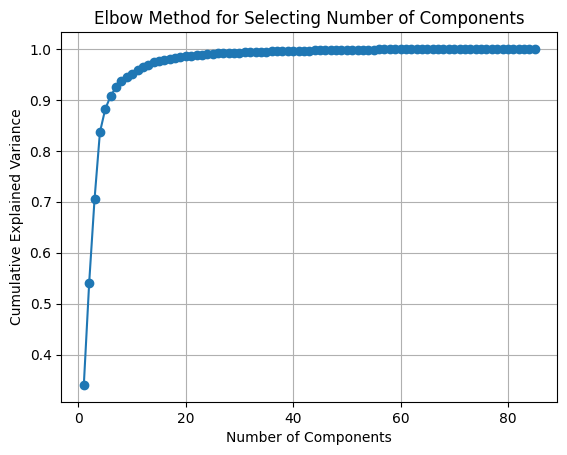

In [18]:
# elbow 시각화

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러오고 전처리합니다.
# 여기서는 예시로 iris 데이터를 사용합니다.
from sklearn.datasets import load_iris


# PCA를 수행하여 설명된 분산을 계산합니다.
pca = PCA()
pca.fit(df_x)

# 설명된 분산을 가져옵니다.
explained_variance = pca.explained_variance_ratio_

# 누적 설명된 분산을 계산합니다.
cumulative_variance = np.cumsum(explained_variance)

# 주성분 개수 범위를 설정합니다.
num_components = len(explained_variance)
components_range = range(1, num_components + 1)

# 누적 설명된 분산을 시각화합니다.
plt.plot(components_range, cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Selecting Number of Components')
plt.grid(True)
plt.show()


In [19]:
# PCA를 통해 만들어진 독립변수들의 새로운 형태
X_transformed

array([[-11.99106794,   4.77833936,  -0.20468018, ...,   0.39665832,
         -0.67640941,   0.06159009],
       [  6.33939921,  -5.67970953,  -3.4234013 , ...,   0.71876271,
         -1.62889198,  -0.77306313],
       [  2.87482971,  -0.76561034,   1.57970363, ...,   2.08574728,
          0.94684168,   0.22499849],
       ...,
       [  6.70178892,  -1.68418147,   2.30859488, ...,  -0.14384932,
         -0.49313422,  -0.63344664],
       [ -1.2106371 ,   3.2123303 ,   1.21659249, ...,  -1.1894062 ,
         -0.81185157,  -0.60257734],
       [  6.07925586,  -0.77812694,   4.62456768, ...,  -1.75626924,
         -0.47720979,  -0.41010384]])

### Logistic 모델
모델을 돌려보자. train, test를 나누지 않고 우선 해보자

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression, Ridge # LassoCV시 오겹 교차검증...?
import statsmodels.api as sm

In [21]:
y = df['target']
X = df.drop('target', axis = 1)
X_cons = sm.add_constant(X) # 상수로 1을 더한다.

In [22]:
# 기존 데이터에서 logisitc
model_log = sm.Logit(y, X_cons).fit()
model_log.summary()

Optimization terminated successfully.
         Current function value: 0.452286
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:              1072781
Model:                          Logit   Df Residuals:                  1072695
Method:                           MLE   Df Model:                           85
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                 0.08796
Time:                        13:33:38   Log-Likelihood:            -4.8520e+05
converged:                       True   LL-Null:                   -5.3200e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -222.7895      3.123    -71.348      0.000    -228.910    -216.669
annual_inc                    -0.0495      0.003    -16.509      0.000      -0.055      -0.044
dti                            0.1810      0.004     46.154      0.000       0.173       0.189
installment                    0.0864      0.021      4.209      0.000       0.046       0.127
int_rate                       0.0440      0.002     26.254      0.000       0.041       0.047
loan_amnt                      0.0811      0.024      3.317      0.001       0.033       0.129
mort_acc                      -0.1796      0.005    -33.979      0.000      -0.190      -0.169
mo_sin_old_il_acct            -0.0321      0.003    -10.820      0.000      -0.038      -0.026
mo_sin_old_rev_tl_op          -0.0374      0.003    -11.094      0.000      -0.044      -0.031
num_accts_ever_120_pd         -0.0003      0.002     -0.171      0.865      -0.004       0.003
pub_rec                        0.0264      0.005      5.019      0.000       0.016       0.037
pub_rec_bankruptcies           0.0450      0.009      5.247      0.000       0.028       0.062
emp_length_int                -0.0183      0.001    -26.329      0.000      -0.020      -0.017
issue_d_year                   0.1097      0.002     70.638      0.000       0.107       0.113
issue_d_month                  0.0102      0.001     13.492      0.000       0.009       0.012
grade_numeric                 -0.1512      0.006    -24.271      0.000      -0.163      -0.139
fico_range_mean               -0.2639      0.005    -55.491      0.000      -0.273      -0.255
home_ownership_MORTGAGE       -0.1707      0.091     -1.872      0.061      -0.349       0.008
home_ownership_NONE            0.4081      0.501      0.814      0.416      -0.574       1.390
home_ownership_OTHER           0.6637      0.265      2.507      0.012       0.145       1.183
home_ownership_OWN            -0.0512      0.091     -0.560      0.575      -0.230       0.128
home_ownership_RENT            0.0617      0.091      0.677      0.499      -0.117       0.240
purpose_credit_card            0.0938      0.028      3.334      0.001       0.039       0.149
purpose_debt_consolidation     0.1492      0.028      5.375      0.000       0.095       0.204
purpose_educational            1.2312      0.165      7.451      0.000       0.907       1.555
purpose_home_improvement       0.2246      0.029      7.619      0.000       0.167       0.282
purpose_house                  0.1925      0.042      4.622      0.000       0.111       0.274
purpose_major_purchase         0.2157      0.032      6.640      0.000       0.152       0.279
purpose_medical                0.2861      0.036      8.010      0.000       0.216       0.356
purpose_moving                 0.1928      0.040      4.821      0.000       0.114       0.271
purpose_other                  0.1719      0.029      5.865      0.000       0.114       0.229
purpose_ren

In [23]:
X_trans_con = sm.add_constant(X_transformed)

In [24]:
model_log_pca = sm.Logit(df_y, X_trans_con).fit()
model_log_pca.summary()

Optimization terminated successfully.
         Current function value: 0.459110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:              1072781
Model:                          Logit   Df Residuals:                  1072770
Method:                           MLE   Df Model:                           10
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                 0.07420
Time:                        13:33:45   Log-Likelihood:            -4.9252e+05
converged:                       True   LL-Null:                   -5.3200e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5408      0.003   -571.093      0.000      -1.546      -1.536
x1            -0.1270      0.001   -252.101      0.000      -0.128      -0.126
x2            -0.0260      0.001    -37.224      0.000      -0.027      -0.025
x3             0.0041      0.001      5.507      0.000       0.003       0.006
x4            -0.0630      0.003    -22.803      0.000      -0.068      -0.058
x5            -0.0951      0.001    -66.434      0.000      -0.098      -0.092
x6            -0.0158      0.002     -8.627      0.000      -0.019      -0.012
x7            -0.0357      0.003    -14.003      0.000      -0.041      -0.031
x8            -0.1061      0.003    -37.892      0.000      -0.112      -0.101
x9             0.1382      0.003     41.774      0.000       0.132       0.145
x10            0.2308      0.004     63.811      0.000       0.224       0.238
==============================================================================
"""

In [25]:
# 스코어를 비교하기 위해선 sklearn이 편함
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [26]:
print(X_cons.shape)
print(X_trans_con.shape)
print(df_y.shape)

(1072781, 86)
(1072781, 11)
(1072781,)


In [27]:
## 기본 모델
# 모델을 정의하고 학습합니다.
model = LogisticRegression()
model.fit(X_cons, df_y)

# 테스트 데이터로 예측합니다.
y_pred = model.predict(X_cons)


# 정확도를 계산합니다.
accuracy = accuracy_score(df_y, y_pred)


print("로지스틱 회귀 모델의 정확도:", accuracy)

# F1 스코어를 계산합니다.
f1 = f1_score(df_y, y_pred, average='macro')

print("F1 스코어:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 모델의 정확도: 0.8038080465630917
F1 스코어: 0.500277458605279


In [31]:
from sklearn.metrics import classification_report

print(classification_report(df_y, model.predict(X_cons)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89    861680
           1       0.51      0.06      0.11    211101

    accuracy                           0.80   1072781
   macro avg       0.66      0.52      0.50   1072781
weighted avg       0.75      0.80      0.74   1072781



In [32]:
## PCA를 한 모델
# 모델을 정의하고 학습합니다.
model = LogisticRegression()

model.fit(X_trans_con, df_y)

# 테스트 데이터로 예측합니다.

y_pred_pca = model.predict(X_trans_con)

# 정확도를 계산합니다.
accuracy_pca = accuracy_score(df_y, y_pred_pca)

print("로지스틱 회귀 모델의 정확도:", accuracy)
print("로지스틱 회귀 모델의 정확도(pca):", accuracy_pca)

# F1 스코어를 계산합니다.

f1_pca = f1_score(df_y, y_pred_pca, average='macro')
print("F1 스코어(pca:", f1_pca)


로지스틱 회귀 모델의 정확도: 0.8038080465630917
로지스틱 회귀 모델의 정확도(pca): 0.8028917365240436
F1 스코어(pca: 0.499242091267442


In [33]:
print(classification_report(df_y, model.predict(X_trans_con)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89    861680
           1       0.49      0.06      0.11    211101

    accuracy                           0.80   1072781
   macro avg       0.65      0.52      0.50   1072781
weighted avg       0.75      0.80      0.74   1072781



In [34]:
X_transformed

array([[-11.99106794,   4.77833936,  -0.20468018, ...,   0.39665832,
         -0.67640941,   0.06159009],
       [  6.33939921,  -5.67970953,  -3.4234013 , ...,   0.71876271,
         -1.62889198,  -0.77306313],
       [  2.87482971,  -0.76561034,   1.57970363, ...,   2.08574728,
          0.94684168,   0.22499849],
       ...,
       [  6.70178892,  -1.68418147,   2.30859488, ...,  -0.14384932,
         -0.49313422,  -0.63344664],
       [ -1.2106371 ,   3.2123303 ,   1.21659249, ...,  -1.1894062 ,
         -0.81185157,  -0.60257734],
       [  6.07925586,  -0.77812694,   4.62456768, ...,  -1.75626924,
         -0.47720979,  -0.41010384]])

In [35]:
df_new = pd.DataFrame(X_transformed)

In [36]:
df_new['target'] = df_y

In [37]:
df_new.to_csv('/content/drive/MyDrive/Colab Notebooks/model/4.24_pca.csv')